In [1]:
from keras import models , layers , utils
import tensorflow as tf
import matplotlib.pyplot as plt


train_dir = "src/train2Emos"
val_dir = "src/val2emos"

BATCH_SZIZE = 32

IMG_SIZE = (160, 160)

train_images = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SZIZE,
                                                            image_size=IMG_SIZE
                                                            )


test_images = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SZIZE,
                                                                 image_size=IMG_SIZE
                                                                 )



# Normalize pixel values to be between 0 and 1
#train_images, test_images = train_images / 255.0, test_images / 255.0



classes = ["3","4"]
class_names = ["happy","neutral"]

# plt.figure(figsize=(10,10))
# for i in range(32):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[0][i])
#     # The CIFAR labels happen to be arrays,
#     # which is why you need the extra index
#     plt.xlabel(class_names[classes[i][0]])
# plt.show()


model = models.Sequential()
model.add(layers.InputLayer(input_shape=(160,160,3)))
model.add(layers.Rescaling(scale=1./255.))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1 , activation="sigmoid"))


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, epochs=15,
                    validation_data=test_images)




Found 2064 files belonging to 2 classes.
Metal device set to: Apple M1
Found 725 files belonging to 2 classes.
Epoch 1/15


2022-05-04 13:53:30.608529: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-04 13:53:30.608620: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


ValueError: in user code:

    File "/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/keras/losses.py", line 1932, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/Users/anasarodake/miniforge3/envs/deep/lib/python3.8/site-packages/keras/backend.py", line 5247, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


23/23 - 1s - loss: 0.7107 - accuracy: 0.6979 - 1s/epoch - 46ms/step


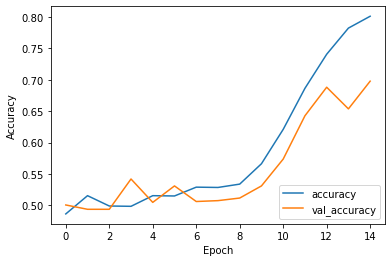

In [2]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, verbose=2)

23/23 - 1s - loss: 0.5957 - accuracy: 0.7021 - 988ms/epoch - 43ms/step


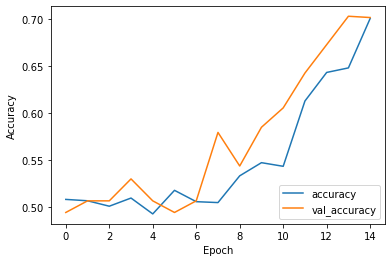

In [3]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, verbose=2)

In [3]:
test_images2 = tf.keras.utils.image_dataset_from_directory("src/test2emos",
                                                          shuffle=True,
                                                          batch_size=BATCH_SZIZE,
                                                          image_size=IMG_SIZE
                                                          )
model.evaluate(test_images2)

Found 9910 files belonging to 2 classes.
310/310 [==============================] - 16s 49ms/step - loss: 0.6019 - accuracy: 0.7347


[0.6019493341445923, 0.7347124218940735]

In [4]:

test_images2 = tf.keras.utils.image_dataset_from_directory("/Users/anasarodake/anas_fotos/test",
                                                           shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )
model.evaluate(test_images2)

Found 550 files belonging to 2 classes.
18/18 [==============================] - 1s 60ms/step - loss: 0.7797 - accuracy: 0.6618


[0.7797353863716125, 0.6618182063102722]